In [44]:
import pandas as pd

data = pd.read_csv("dataset.csv")

print("Первые строки: ", data.head())
print("Размер датасета: ", data.shape)
print("Типы данных: ", data.dtypes)

Первые строки:     RANK      NAME LANGUAGE         TYPE              MOST_STREAMED_GAME  \
0     1  kaicenat  English  personality                   Just Chatting   
1     2    jynxzi  English  personality  Tom Clancy's Rainbow Six Siege   
2     3   caedrel  English  personality               League of Legends   
3     4   caseoh_  English  personality                        NBA 2K23   
4     5      ibai  Spanish  personality                   Just Chatting   

  2ND_MOST_STREAMED_GAME  AVERAGE_STREAM_DURATION  \
0      I'm Only Sleeping                      7.6   
1               NBA 2K20                      5.4   
2      I'm Only Sleeping                      6.3   
3          Just Chatting                      4.6   
4      League of Legends                      4.1   

   FOLLOWERS_GAINED_PER_STREAM  AVG_VIEWERS_PER_STREAM  AVG_GAMES_PER_STREAM  \
0                       18.405                  15.852                   2.3   
1                        3.386                   1.145

# Описание данных

Датасет содержит информацию о стримерах на Twitch и включает 999 строк и 17 столбцов. Ниже представлено краткое описание каждого столбца:

- **RANK**: Ранг стримера, числовой (`int64`).
- **NAME**: Имя стримера, текстовый (`object`).
- **LANGUAGE**: Язык стримера, текстовый (`object`).
- **TYPE**: Тип контента, текстовый (`object`).
- **MOST_STREAMED_GAME**: Игра, которую чаще всего стримили, текстовый (`object`).
- **2ND_MOST_STREAMED_GAME**: Вторая по популярности игра, текстовый (`object`).
- **AVERAGE_STREAM_DURATION**: Средняя длительность стрима в часах, числовой (`float64`).
- **FOLLOWERS_GAINED_PER_STREAM**: Количество подписчиков, полученных за стрим, числовой (`float64`).
- **AVG_VIEWERS_PER_STREAM**: Среднее количество зрителей на стриме, числовой (`float64`).
- **AVG_GAMES_PER_STREAM**: Среднее количество игр на стрим, числовой (`float64`).
- **TOTAL_TIME_STREAMED**: Общее время стрима в часах, числовой (`float64`).
- **TOTAL_FOLLOWERS**: Общее количество подписчиков, числовой (`int64`).
- **TOTAL_VIEWS**: Общее количество просмотров, числовой (`int64`).
- **TOTAL_GAMES_STREAMED**: Общее количество стримленных игр, числовой (`int64`).
- **ACTIVE_DAYS_PER_WEEK**: Активные дни в неделю, числовой (`float64`).
- **MOST_ACTIVE_DAY**: Самый активный день недели, текстовый (`object`).
- **DAY_WITH_MOST_FOLLOWERS_GAINED**: День недели с наибольшим приростом подписчиков, текстовый (`object`).



In [45]:
missing_values = data.isnull().sum()

duplicate_rows = data.duplicated().sum()

data["TOTAL_FOLLOWERS"] = (
    data["TOTAL_FOLLOWERS"].astype(str).str.replace(".", "").astype(int)
)
data["TOTAL_VIEWS"] = data["TOTAL_VIEWS"].astype(str).str.replace(".", "").astype(int)

missing_values, duplicate_rows

(RANK                               0
 NAME                               0
 LANGUAGE                           0
 TYPE                               0
 MOST_STREAMED_GAME                 0
 2ND_MOST_STREAMED_GAME            77
 AVERAGE_STREAM_DURATION            0
 FOLLOWERS_GAINED_PER_STREAM        0
 AVG_VIEWERS_PER_STREAM             0
 AVG_GAMES_PER_STREAM               0
 TOTAL_TIME_STREAMED                0
 TOTAL_FOLLOWERS                    0
 TOTAL_VIEWS                        0
 TOTAL_GAMES_STREAMED               0
 ACTIVE_DAYS_PER_WEEK               0
 MOST_ACTIVE_DAY                    0
 DAY_WITH_MOST_FOLLOWERS_GAINED     0
 dtype: int64,
 0)

В столбце **2ND_MOST_STREAMED_GAME** есть 77 пропущенных значений. Это может указывать на то, что некоторые стримеры предпочитают транслировать только одну игру, и поэтому у них нет второй по популярности игры.

Для работы с пропущенными значениями в столбце **2ND_MOST_STREAMED_GAME**, учитывая, что это категориальный признак, можно заменить пропуски на специальное значение, например "Not Available", что будет указывать на отсутствие второй игры.

In [46]:
data["2ND_MOST_STREAMED_GAME"].fillna("Not Available", inplace=True)

descriptive_stats = data.describe()

descriptive_stats

/var/folders/xc/7xdj8ztx5wvgfgtfqx8y9jj00000gn/T/ipykernel_44298/1705702395.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["2ND_MOST_STREAMED_GAME"].fillna("Not Available", inplace=True)


,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,9.990000e+02,9.990000e+02,999.000000,999.000000
mean,500.972973,5.996697,266.788599,70.257758,1.477878,56.961769,9.194033e+05,3.001478e+07,141.707708,3.591391
std,288.576373,3.241013,274.912323,163.873300,0.575189,322.866528,1.725451e+06,6.280328e+07,245.930466,1.797796
min,1.000000,1.200000,-424.000000,0.000000,1.000000,1.004000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,251.500000,4.200000,5.546500,3.381000,1.100000,3.702000,1.875000e+05,6.455000e+05,16.000000,2.200000
50%,501.000000,5.400000,185.000000,12.454000,1.300000,7.140000,4.370000e+05,6.950000e+06,55.000000,3.800000
75%,750.500000,6.900000,444.000000,37.596000,1.700000,13.588500,8.895000e+05,3.015000e+07,168.000000,5.100000
max,1000.000000,23.900000,991.000000,991.000000,9.300000,9092.000000,1.900000e+07,5.720000e+08,2980.000000,7.000000


В данных присутствуют потенциальные выбросы и аномалии, особенно в столбцах **FOLLOWERS_GAINED_PER_STREAM** и **TOTAL_TIME_STREAMED**. Для их обработки мы можем использовать методы межквартильного размаха (IQR), чтобы идентифицировать и исключить эти выбросы.

In [47]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


data_cleaned_time = remove_outliers(data, "TOTAL_TIME_STREAMED")
data_cleaned = remove_outliers(
    data_cleaned_time, "FOLLOWERS_GAINED_PER_STREAM"
)

print("Размер датасета после удаления выбросов: ", data_cleaned.shape)
data_cleaned.describe()

Размер датасета после удаления выбросов:  (885, 17)


,RANK,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,8.850000e+02,8.850000e+02,885.000000,885.000000
mean,497.731073,5.840565,277.545746,73.682681,1.483616,7.792238,9.834271e+05,3.197879e+07,151.666667,3.807232
std,290.932414,2.564409,271.024203,168.392209,0.503059,5.597856,1.793710e+06,6.320623e+07,235.737762,1.648382
min,1.000000,1.200000,-1.277000,0.000000,1.000000,1.004000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,240.000000,4.300000,8.757000,4.036000,1.100000,3.332000,2.210000e+05,1.250000e+06,24.000000,2.600000
50%,498.000000,5.500000,207.000000,13.147000,1.300000,6.296000,4.750000e+05,9.080000e+06,68.000000,4.000000
75%,751.000000,6.900000,446.000000,38.930000,1.700000,10.995000,9.490000e+05,3.330000e+07,181.000000,5.100000
max,1000.000000,23.900000,991.000000,991.000000,4.100000,28.000000,1.900000e+07,5.720000e+08,2710.000000,7.000000


После удаления выбросов датасет содержит 885 строк. Это показывает, что изначально в данных были значительные выбросы, особенно в столбцах TOTAL_TIME_STREAMED и FOLLOWERS_GAINED_PER_STREAM. Описательные статистики данных, очищенных от выбросов, представляют более реалистичный обзор активности стримеров:

- Средняя длительность стримов составляет примерно 5.8 часов, что меньше по сравнению с исходным средним значением.
- Среднее количество подписчиков, приобретенных за стрим, также выглядит более реалистично, исключив неправдоподобно высокие или отрицательные значения.
- Общее время стримов и количество подписчиков теперь имеют более узкий разброс значений, что упрощает анализ.

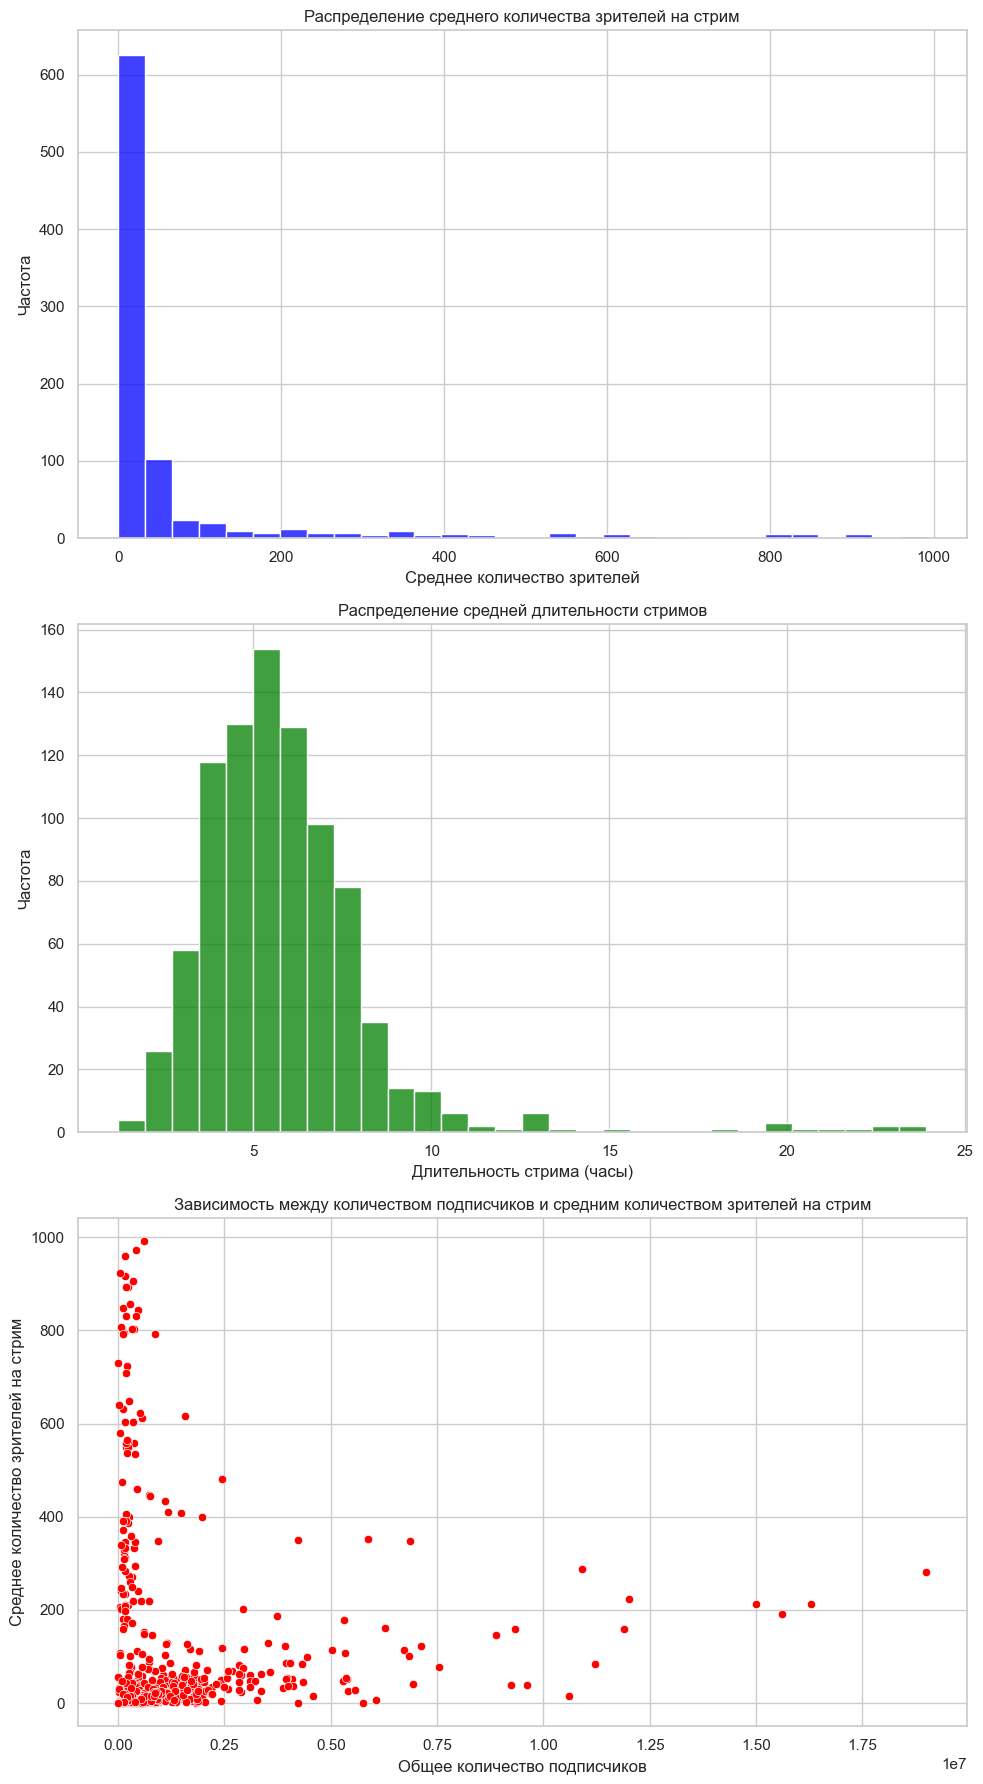

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 1, figsize=(10, 18))

sns.histplot(
    data_cleaned["AVG_VIEWERS_PER_STREAM"], bins=30, ax=axes[0], color="blue"
)
axes[0].set_title("Распределение среднего количества зрителей на стрим")
axes[0].set_xlabel("Среднее количество зрителей")
axes[0].set_ylabel("Частота")

sns.histplot(
    data_cleaned["AVERAGE_STREAM_DURATION"],
    bins=30,
    ax=axes[1],
    color="green",
)
axes[1].set_title("Распределение средней длительности стримов")
axes[1].set_xlabel("Длительность стрима (часы)")
axes[1].set_ylabel("Частота")

sns.scatterplot(
    x="TOTAL_FOLLOWERS",
    y="AVG_VIEWERS_PER_STREAM",
    data=data_cleaned,
    ax=axes[2],
    color="red",
)
axes[2].set_title(
    "Зависимость между количеством подписчиков и средним количеством зрителей на стрим"
)
axes[2].set_xlabel("Общее количество подписчиков")
axes[2].set_ylabel("Среднее количество зрителей на стрим")

plt.tight_layout()
plt.show()

Распределение среднего количества зрителей на стрим:

- Большинство стримеров имеет относительно низкое среднее количество зрителей, что видно из пика гистограммы около нижних значений. Это говорит о том, что высокие показатели зрителей — редкость и часто связаны с популярными стримерами.

Распределение средней длительности стримов:

- Большинство стримов длится от 4 до 7 часов. Это указывает на то, что стримеры предпочитают поддерживать умеренно длительные сессии, что может быть связано с удержанием внимания аудитории и личными ограничениями по времени.

Зависимость между количеством подписчиков и средним количеством зрителей на стрим:

- На диаграмме рассеяния видно, что с увеличением количества подписчиков часто растет и среднее количество зрителей. Это подтверждает ожидаемую зависимость, где популярные стримеры с большим числом подписчиков чаще привлекают больше зрителей.

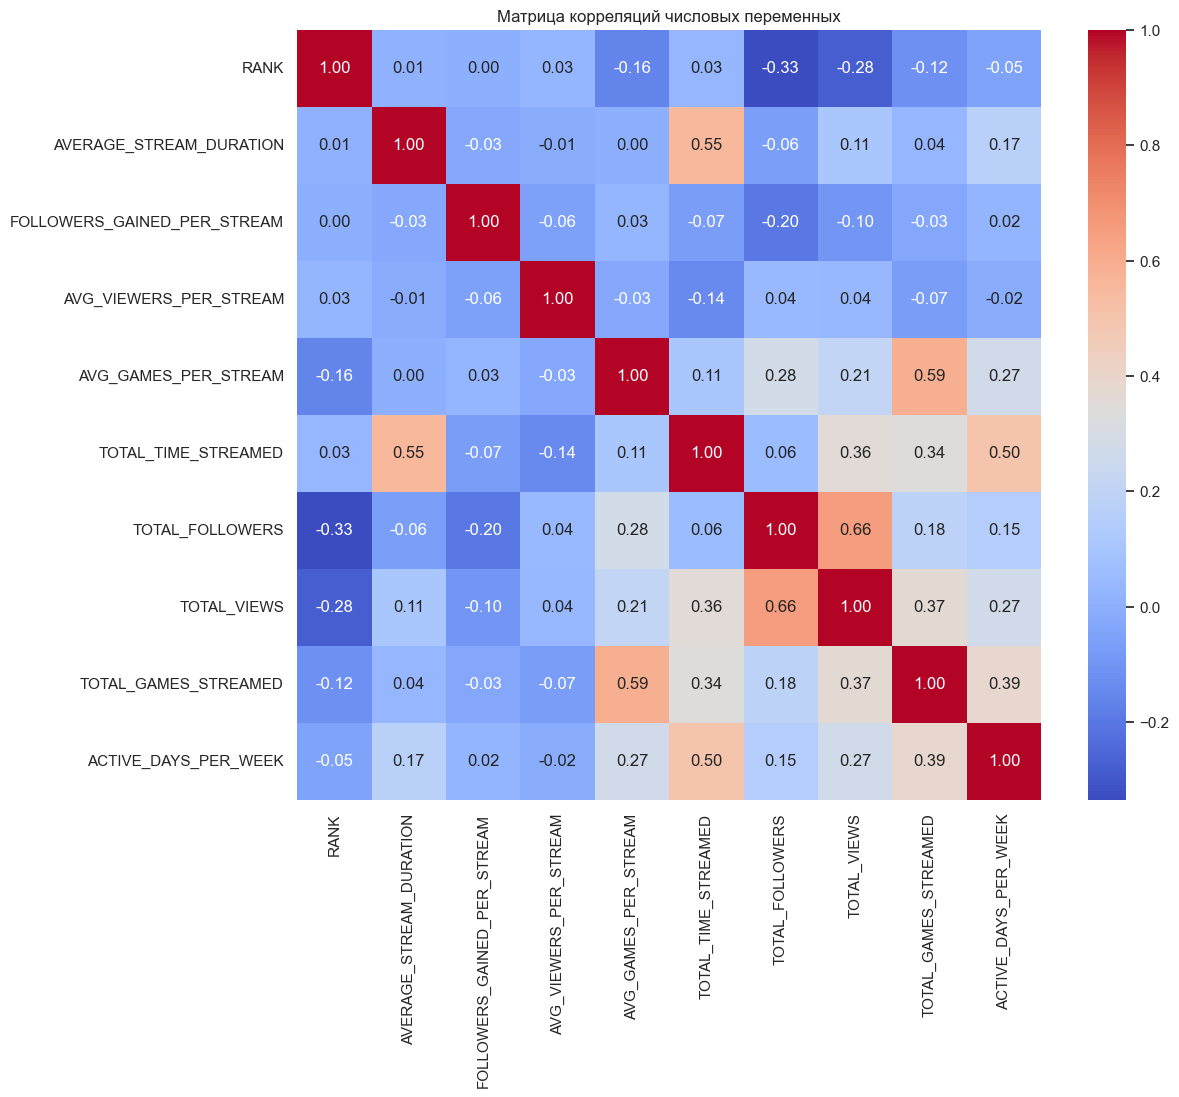

In [49]:
numerical_data = data_cleaned.select_dtypes(include=["float64", "int64"])

correlation_matrix = numerical_data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Матрица корреляций числовых переменных")
plt.show()

# Анализ таблицы корреляции

- Среднее время стрима (AVERAGE_STREAM_DURATION) имеет сильную положительную корреляцию с Общим временем стрима (TOTAL_TIME_STREAMED) (0.55), что логично, так как стримеры, проводящие больше времени за один стрим, скорее всего, будут иметь большее общее время стрима.

- Общее количество подписчиков (TOTAL_FOLLOWERS) и Общее количество просмотров (TOTAL_VIEWS) тесно связаны (коэффициент корреляции 0.66), что указывает на то, что стримеры с большим количеством подписчиков, как правило, имеют большее количество просмотров.

- Общее количество игр, стримленных (TOTAL_GAMES_STREAMED) сильно коррелирует с Общим временем стрима (0.59) и Активными днями в неделю (0.50). Это может свидетельствовать о том, что чем активнее стример, тем больше игр он стримит, и тем больше времени он проводит в эфире.

- Интересно, что Ранг (RANK) имеет отрицательную корреляцию с Общим количеством подписчиков (-0.33) и Общим количеством просмотров (-0.28). Это может означать, что более высокий ранг (ближе к 1) ассоциируется с большим количеством подписчиков и просмотров.

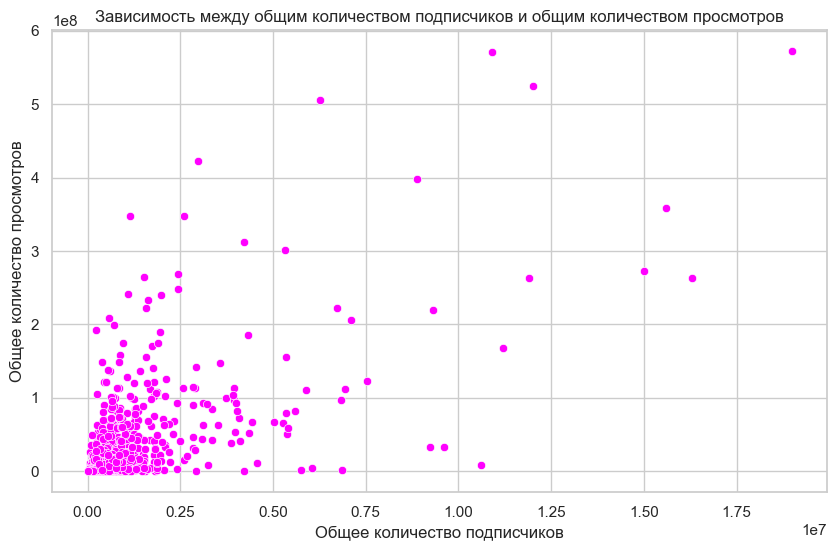

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="TOTAL_FOLLOWERS",
    y="TOTAL_VIEWS",
    data=data_cleaned,
    color="magenta",
)
plt.title("Зависимость между общим количеством подписчиков и общим количеством просмотров")
plt.xlabel("Общее количество подписчиков")
plt.ylabel("Общее количество просмотров")
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

data["is_just_chatting"] = (data["MOST_STREAMED_GAME"] == "Just Chatting").astype(int)

features = data[
    ["AVERAGE_STREAM_DURATION", "AVG_VIEWERS_PER_STREAM", "TOTAL_TIME_STREAMED"]
]
target = data["is_just_chatting"]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(
    features_scaled, target, test_size=0.3, random_state=42
)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

accuracy, classification_report_result

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

(0.7633333333333333,
 '              precision    recall  f1-score   support\n\n           0       0.76      1.00      0.87       229\n           1       0.00      0.00      0.00        71\n\n    accuracy                           0.76       300\n   macro avg       0.38      0.50      0.43       300\nweighted avg       0.58      0.76      0.66       300\n')

# Оценка качества модели логистической регрессии
Модель предсказывает, транслирует ли стример игру "Just Chatting" в качестве основной. Основные результаты:

- Точность (Accuracy): 76.33% — показывает долю правильно предсказанных наблюдений из всех предсказаний. Это хороший показатель только в случае сбалансированных классов, что, как мы видим, здесь не так.

- Precision: 0.00 — означает, что модель не смогла корректно предсказать ни одного случая, когда стример транслирует 'Just Chatting' как основную игру. То есть, модель ни разу не отнесла наблюдение к классу 1, когда это было действительно так.

- Recall: 0.00 — это говорит о том, что все случаи, когда стримеры транслировали 'Just Chatting', не были обнаружены моделью. Иными словами, все реальные случаи класса 1 были пропущены.

- F1-score: 0.00 — гармоническое среднее Precision и Recall, также равное нулю из-за нулевых значений этих метрик. Это указывает на полное отсутствие способности модели правильно классифицировать стримеров 'Just Chatting'.

- Precision и Recall для класса 'Not Just Chatting' (0): 0.76 и 1.00 соответственно — модель хорошо справляется с определением случаев, когда стримеры не транслируют 'Just Chatting'.

Модель показывает высокий уровень точности за счет правильного предсказания наиболее часто встречающегося класса, но полностью игнорирует менее представленный класс, что делает ее непригодной для использования в такой задаче, как определение трансляций 'Just Chatting'.

# Гипотезы

1. Z-тест на математическое ожидание

Гипотеза:

H0 (нулевая гипотеза): Среднее количество зрителей на стрим (AVG_VIEWERS_PER_STREAM) равно 15.

H1 (альтернативная гипотеза): Среднее количество зрителей на стрим не равно 15.

2. T-тест на математическое ожидание

Гипотеза:

H0: Средняя продолжительность стрима (AVERAGE_STREAM_DURATION) составляет 5 часов.

H1: Средняя продолжительность стрима не составляет 5 часов.

3. Тест на равенство математических ожиданий двух выборок

Гипотеза:

H0: Среднее количество зрителей на стрим у стримеров, транслирующих на английском, равно среднему количеству зрителей у стримеров, транслирующих на испанском.

H1: Эти средние значения различаются.

4. Критерий независимости хи-квадрат

Гипотеза:

H0: Язык трансляции (LANGUAGE) и день с максимальным приростом подписчиков (DAY_WITH_MOST_FOLLOWERS_GAINED) независимы друг от друга.

H1: Между языком трансляции и днем с максимальным приростом подписчиков существует зависимость.

5. Критерий согласия хи-квадрат

Гипотеза:

H0: Распределение активных дней в неделю (ACTIVE_DAYS_PER_WEEK) следует равномерному распределению.

H1: Распределение активных дней не является равномерным.

In [52]:
pip install statsmodels


Note: you may need to restart the kernel to use updated packages.


In [53]:
from statsmodels.stats.weightstats import ztest

# H0: AVG_VIEWERS_PER_STREAM = 15
# H1: AVG_VIEWERS_PER_STREAM != 15

z_stat, p_value = ztest(data["AVG_VIEWERS_PER_STREAM"], value=15)

z_stat, p_value

(10.65780583236442, 1.6033546232550814e-26)

# Результаты Z-теста

Z-статистика: 10.66

P-значение: 1.6×10**−26
 

# Вывод по Z-тесту

Поскольку p-значение гораздо меньше стандартного уровня значимости 0.05, мы отвергаем нулевую гипотезу. Это означает, что среднее количество зрителей на стрим статистически значимо отличается от 15.

In [54]:
from scipy.stats import ttest_1samp

# H0: AVERAGE_STREAM_DURATION = 5 hours
# H1: AVERAGE_STREAM_DURATION != 5 hours

t_stat, p_value = ttest_1samp(data["AVERAGE_STREAM_DURATION"], popmean=5)

t_stat, p_value

(9.71997046243097, 2.1260434591611816e-21)

# Результаты T-теста

T-статистика: 9.72

P-значение:
2.13×10**−21
 

# Вывод по T-тесту

Снова, учитывая что p-значение значительно меньше 0.05, мы отвергаем нулевую гипотезу. Это указывает на то, что средняя продолжительность стрима статистически значимо не равна 5 часам.

In [55]:
from scipy.stats import ttest_ind

viewers_english = data[data["LANGUAGE"] == "English"]["AVG_VIEWERS_PER_STREAM"]
viewers_spanish = data[data["LANGUAGE"] == "Spanish"]["AVG_VIEWERS_PER_STREAM"]

# H0: Mean viewers for English streams = Mean viewers for Spanish streams
# H1: Mean viewers for English streams != Mean viewers for Spanish streams

t_stat, p_value = ttest_ind(viewers_english, viewers_spanish, equal_var=False)

t_stat, p_value

(0.9076505242510439, 0.36525975497665153)

# Результаты T-теста на равенство средних

T-статистика: 0.91

P-значение: 0.365

# Вывод по тесту на равенство средних

P-значение выше установленного порога 0.05, что указывает на то, что нет статистически значимого различия в среднем количестве зрителей между стримерами, транслирующими на английском и испанском языках. Таким образом, нулевая гипотеза не отвергается.

In [56]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(
    data["LANGUAGE"], data["DAY_WITH_MOST_FOLLOWERS_GAINED"]
)

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

chi2_stat, p_value

(136.90222175242906, 0.03153393366723836)

# Результаты хи-квадрат теста на независимость

Хи-квадрат статистика: 136.90

P-значение: 0.0315

# Вывод по хи-квадрат тесту

P-значение меньше 0.05, что позволяет нам отвергнуть нулевую гипотезу о независимости между языком трансляции и днем с максимальным приростом подписчиков. Это означает, что существует статистически значимая зависимость между этими двумя переменными.

In [57]:
from scipy.stats import chisquare

unique_days = sorted(data["ACTIVE_DAYS_PER_WEEK"].unique())
observed = (
    data["ACTIVE_DAYS_PER_WEEK"].value_counts().reindex(unique_days, fill_value=0)
)

expected_uniform = [len(data) / len(unique_days)] * len(unique_days)

chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected_uniform)

chi2_stat, p_value

(182.2722722722723, 5.996562451386636e-12)

# Результаты хи-квадрат теста на согласие

Хи-квадрат статистика: 182.27

P-значение: 6.0×10**−12
 

# Вывод по хи-квадрат тесту на согласие

P-значение значительно меньше порога 0.05, что позволяет нам отвергнуть нулевую гипотезу о том, что распределение активных дней в неделю следует равномерному распределению. Это означает, что активные дни в неделю не распределены равномерно, и некоторые дни являются более или менее активными, чем другие.

# Общий вывод по тестированию гипотез

В ходе выполнения статистических тестов мы выявили:

Z-тест: Среднее количество зрителей на стрим статистически значимо отличается от 15.

T-тест на одну выборку: Средняя продолжительность стрима не равна 5 часам.

T-тест на равенство средних: Нет статистически значимой разницы в среднем количестве зрителей между стримерами, транслирующими на английском и испанском языках.

Хи-квадрат тест на независимость: Существует зависимость между языком трансляции и днем с максимальным приростом подписчиков.

Хи-квадрат тест на согласие: Активные дни в неделю не распределены равномерно.